# Part I - (Dataset Exploration for a Salary Survey)

## by Theodore Kabangu Nkashama

## Introduction

> In this project we will explore a dataset related to a salary survey. It contains salary amounts in US dollar for 27147 
> persons from different origins, ethnicities, age ranges, industries and so forth who filled the survey form for the purpose.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Collecting data

In [2]:
# Loading data
df_salary = pd.read_csv('salary_survey_data.csv')

In [3]:
df_salary.shape

(27147, 23)

#### Dataset description

Our dataset has 27147 rows and 23 columns that are described as follows:
1. **Unnamed: 0** which is an id column
2. **Timestamp** this is the date and time the person information were saved
3. **Age** this is the person's age range
4. **Industrie** this is specifies in which Indrustry the responding person works in
5. **Occupation** this is the job position of tha person in their work industry
6. **Salaire** this the salary amount in local currency for the responding person
7. **Monnaie_salaire** this specifies the local currency of the above-mentioned salary
8. **Pays** this is the home country of the person
9. **Ville** this is the home city of the person
10. **Annee_exp_totale** this is the range of the person's total number of years of experience in working
11. **Annee_exp_present** this is the range of the person's number of years of experience in the actual position
12. **Niveau_edu** this is the highest study levelof the person
13. **Sexe** this is the sex of the person
14. **Race** this shows all ethnicities the rresponding person belongs to

> Race and ethnicity columns
15. **Anotheroptionnotlistedhereorprefernottoanswer** 
16. **AsianorAsianAmerican**
17. **BlackorAfricanAmerican**
18. **Hispanic_Latino_or_Spanish origin**
19. **MiddleEasternorNorthernAfrican**
20. **NativeAmericanorAlaskaNative**
21. **White**

> These columns contain 1 (Yes) if the person belongs to that ethnicity, and 0 (No) if not

22. **coef_monnaie** this gives the coefficient by which local salary shall be multiplied in order to convert it into US dollar
23. **Salaire_USD** this is the salary amount in US dollar corresponding to local salary of the person.

### Assessing data

In [4]:
df_salary.head()

,Unnamed: 0,Timestamp,Age,Indrustrie,Occupation,Salaire,Monnaie_salaire,Pays,Ville,Annee_exp_totale,...,Race,Anotheroptionnotlistedhereorprefernottoanswer,AsianorAsianAmerican,BlackorAfricanAmerican,Hispanic_Latino_or_Spanish origin,MiddleEasternorNorthernAfrican,NativeAmericanorAlaskaNative,White,coef_monnaie,Salaire_USD
0,0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,USD,usa,Boston,5-7 years,...,White,0,0,0,0,0,0,1,1.00,55000.0
1,1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600.0,GBP,united kingdom,Cambridge,8 - 10 years,...,White,0,0,0,0,0,0,1,1.15,62790.0
2,2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,USD,us,Chattanooga,2 - 4 years,...,White,0,0,0,0,0,0,1,1.00,34000.0
3,3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,62000.0,USD,usa,Milwaukee,8 - 10 years,...,White,0,0,0,0,0,0,1,1.00,62000.0
4,4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,USD,us,Greenville,8 - 10 years,...,White,0,0,0,0,0,0,1,1.00,60000.0


In [5]:
# dataset description
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27147 entries, 0 to 27146
Data columns (total 23 columns):
Unnamed: 0                                       27147 non-null int64
Timestamp                                        27147 non-null object
Age                                              27147 non-null object
Indrustrie                                       27147 non-null object
Occupation                                       27147 non-null object
Salaire                                          27147 non-null float64
Monnaie_salaire                                  27147 non-null object
Pays                                             27147 non-null object
Ville                                            27147 non-null object
Annee_exp_totale                                 27147 non-null object
Annee_exp_present                                27147 non-null object
Niveau_edu                                       27147 non-null object
Sexe                                   

In [3]:
# Let's make all columns names be in lower case
df_salary.rename(str.lower, axis= 'columns', inplace = True)

In [7]:
df_salary.race.value_counts()[:10]

White                                            22723
AsianorAsianAmerican                              1315
BlackorAfricanAmerican                             645
Anotheroptionnotlistedhereorprefernottoanswer      583
Hispanic,Latino,orSpanishorigin                    568
Hispanic,Latino,orSpanishorigin,White              374
AsianorAsianAmerican,White                         336
BlackorAfricanAmerican,White                       121
MiddleEasternorNorthernAfrican,White                79
NativeAmericanorAlaskaNative,White                  65
Name: race, dtype: int64

#### Issue

**race** column should be dropped for there are columns related to ethnicity in the same dataset instead of having both **race** and ethnicity values columns

In [4]:
# To make them easy to address, we'll replace each of them by a descriptive string

list_ = ['unnamed: 0', 'timestamp', 'age', 'industrie', 'occupation', 'salaire',
       'monnaie_salaire', 'pays', 'ville', 'annee_exp_totale',
       'annee_exp_present', 'niveau_edu', 'sexe', 'race',
         'other_no_say', 'asian_a_american',
       'black_af_american', 'hispanic_latino_spanish',
       'mid_east_north_african', 'nat_american_alaska_native',
       'white', 'coef_monnaie', 'salaire_usd']

df_salary.rename(columns =  lambda x: str(list_[list(df_salary.columns).index(x)]) if (x not in list_) else x, inplace = True)

In [5]:
# Let's drop unuseful columns
df_salary.drop(['unnamed: 0', 'timestamp', 'race', 'salaire', 'monnaie_salaire', 'coef_monnaie'], axis = 1, inplace= True)

In [10]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27147 entries, 0 to 27146
Data columns (total 17 columns):
age                           27147 non-null object
industrie                     27147 non-null object
occupation                    27147 non-null object
pays                          27147 non-null object
ville                         27147 non-null object
annee_exp_totale              27147 non-null object
annee_exp_present             27147 non-null object
niveau_edu                    27147 non-null object
sexe                          27147 non-null object
other_no_say                  27147 non-null int64
asian_a_american              27147 non-null int64
black_af_american             27147 non-null int64
hispanic_latino_spanish       27147 non-null int64
mid_east_north_african        27147 non-null int64
nat_american_alaska_native    27147 non-null int64
white                         27147 non-null int64
salaire_usd                   27147 non-null float64
dtypes: float

In [72]:
df_salary.annee_exp_totale.value_counts()

11 - 20 years       9345
8 - 10 years        5225
5-7 years           4719
21 - 30 years       3540
2 - 4 years         2875
31 - 40 years        840
1 year or less       483
41 years or more     120
Name: annee_exp_totale, dtype: int64

In [73]:
df_salary.annee_exp_present.value_counts()

11 - 20 years       6352
5-7 years           6323
2 - 4 years         6022
8 - 10 years        4821
21 - 30 years       1828
1 year or less      1396
31 - 40 years        367
41 years or more      38
Name: annee_exp_present, dtype: int64

In [6]:
# convert annee_exp_totale and annee_exp_present into ordered categorical types
exp_order = ['1 year or less',
             '2 - 4 years',
             '5-7 years',
             '8 - 10 years',
             '11 - 20 years',
             '21 - 30 years',
             '31 - 40 years',
             '41 years or more']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = exp_order)
df_salary.annee_exp_totale = df_salary.annee_exp_totale.astype(ordered_var)
df_salary.annee_exp_present = df_salary.annee_exp_present.astype(ordered_var)
df_salary.dtypes

age                             object
industrie                       object
occupation                      object
pays                            object
ville                           object
annee_exp_totale              category
annee_exp_present             category
niveau_edu                      object
sexe                            object
other_no_say                     int64
asian_a_american                 int64
black_af_american                int64
hispanic_latino_spanish          int64
mid_east_north_african           int64
nat_american_alaska_native       int64
white                            int64
salaire_usd                    float64
dtype: object

In [7]:
# Getting persons with salary >= 2000 USD
df_salary = df_salary[df_salary.salaire_usd >= 2000]
df_salary.shape

(27054, 17)

### What is the structure of your dataset?

> After a bit of cleaning, our dataset contains 27054 persons and 17 features retained for exploration. We have got rid of 
> unuseful columns and all persons whose annual salary is lesser than 2000 USD in order to approach a realistic situation.

### What is/are the main feature(s) of interest in your dataset?

> Through this exploration we are interested in figuring out what features impact the **salary** of a person in our dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We expect that **industry**, **job position** and **years of experience** will strongly determine salary level. 
> Moreover, we think **education level** may have at leat a minor effect when compared to that of these three main features.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


### Question 1: What is the distribution of our feature of interest (salary)?

In [75]:
# Let's see the max salary
df_salary['salaire_usd'].max()

102000000.0

In [14]:
# Let's see the min salary
df_salary['salaire_usd'].min()

2350.0

### Visualization

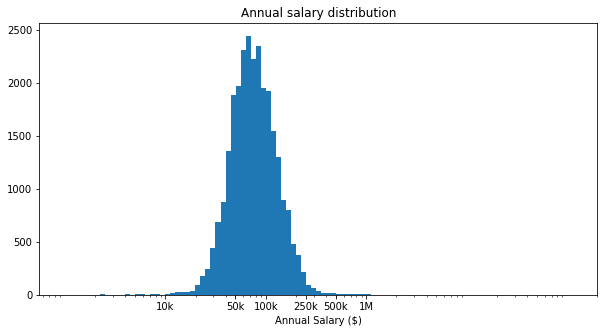

In [76]:
# The standard-scaled plot is computationally expensive and trickier.
# Because of high values therein let's directly reduce values using log10
binsize = 0.05
bins = 10 ** np.arange(3, np.log10(df_salary['salaire_usd'].max())+binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = df_salary, x = 'salaire_usd', bins = bins)
plt.xscale('log')
plt.xticks([1e4, 5e4, 1e5, 25e4, 5e5, 1e6], ['10k', '50k', '100k', '250k', '500k', '1M'])
plt.xlabel('Annual Salary ($)')
plt.title('Annual salary distribution')
plt.show()

In [9]:
# Statistics to confirm the visual
df_salary[(df_salary.salaire_usd >= 50000) & (df_salary.salaire_usd <= 100000)].shape

(14037, 17)

In [78]:
df_salary.shape

(27054, 17)

### Observation

From this visual we notice the salary has almost a normal distribution with the peak between 50000 and 100000. In fact, statistics prove that more than 50% of persons actually in our dataset are paid between 50000 and 100000 USD.

### Question 2 : How are indutries distributed in the data ?

Let's now take industry feature

In [18]:
# Let's see how many industries are here
len(df_salary.industrie.value_counts())

1185

In [81]:
# Since a plot for all these 1185 values is hardly ever readable, let's take the first 10
df_salary.industrie.value_counts()[:10]

Computing or Tech                       4510
Education (Higher Education)            2375
Nonprofits                              2362
Government and Public Administration    1846
Health care                             1835
Accounting, Banking & Finance           1742
Engineering or Manufacturing            1640
Marketing, Advertising & PR             1090
Law                                     1063
Business or Consulting                   820
Name: industrie, dtype: int64

### Visualization

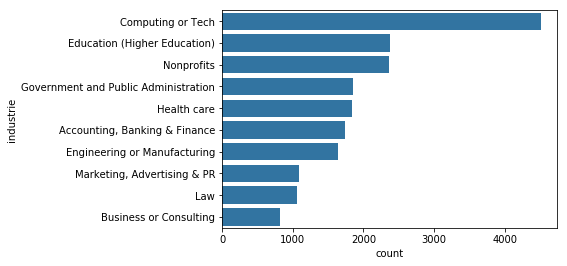

In [20]:
# Plotting the top 10 industries
ind_order = df_salary.industrie.value_counts()[:10].index
base_color = sb.color_palette()[0]
sb.countplot(data = df_salary, y = 'industrie', color = base_color, order = ind_order);

### Observation

From this visual we understand that among the top 10 industries picked up _Computing or Tech_ is the first with more than 4000 persons, _Higher education_ and _Nonprofits_ are respectively the second and the third with more than 2000 persons each, the rest of them have less than 2000 persons and we noted _Business or Consulting_ which is the last with less than 1000 persons.

### Question 3: How are occupations distributed in data ?

Let's take occupation (job position)

In [82]:
# Let's see how many occupations are here
len(df_salary.occupation.value_counts())

13932

In [22]:
# Since it impossible to plot all these values, let's take the first 10
df_salary.occupation.value_counts()[:10]

Software Engineer           278
Project Manager             223
Senior Software Engineer    193
Director                    190
Program Manager             148
Librarian                   146
Teacher                     145
Manager                     134
Executive Assistant         132
Product Manager             121
Name: occupation, dtype: int64

### Visualization 

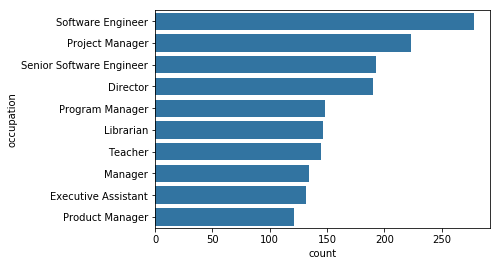

In [23]:
# Plotting the top 10 occupations
ind_order = df_salary.occupation.value_counts()[:10].index
base_color = sb.color_palette()[0]
sb.countplot(data = df_salary, y = 'occupation', color = base_color, order = ind_order);

### Observation

_Software engineer_ and _Project Manager_ are highly occupied positions respectively the first with 278 persons and the second with 223. All the rest have less than 200 persons and among them _Product Manager_ is the last with 121 persons.

### Question 4 : How are experiences ranges distributed in data ?

Let's take experience columns (annee_exp_totale and annee_exp_present) to see it clearer

In [11]:
df_salary.annee_exp_totale.value_counts()

11 - 20 years       9323
8 - 10 years        5215
5-7 years           4708
21 - 30 years       3520
2 - 4 years         2857
31 - 40 years        833
1 year or less       478
41 years or more     120
Name: annee_exp_totale, dtype: int64

### Visualization

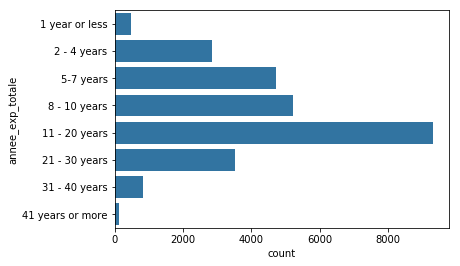

In [13]:
# Plotting the ranges
base_color = sb.color_palette()[0]
sb.countplot(data = df_salary, y = 'annee_exp_totale', color = base_color);

### Observation

Hre we notice that 19246 (more than 70%) persons have their total years of experience between 5 and 20, among these 9323 persons have between 11 and 20 years, 5215 persons have between 8 and 10 years, 4708 have between 5 and 7 years. Among the rest of persons 3520 have between 21 and 30 years, 2857 between 2 and 4 years, 833 between 31 and 40 years, 478 have 1 year or less and finally 120 have 41 or more years.

In [12]:
df_salary.annee_exp_present.value_counts()

11 - 20 years       6335
5-7 years           6312
2 - 4 years         5999
8 - 10 years        4802
21 - 30 years       1818
1 year or less      1386
31 - 40 years        364
41 years or more      38
Name: annee_exp_present, dtype: int64

### Visualization

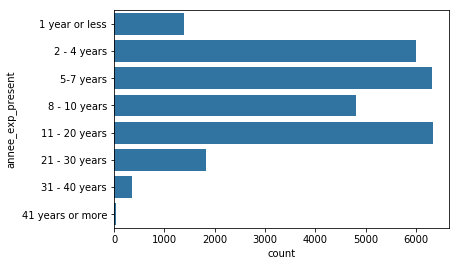

In [86]:
# Plotting the ranges
base_color = sb.color_palette()[0]
sb.countplot(data = df_salary, y = 'annee_exp_present', color = base_color);

### Observation

We notice that more than 17000 persons have years of experience between 5 and 20 in their actual jobs. Among these we find three ranges : _11 - 20 years_ with 6335 persons, _5-7 years_ with 6312, and _8 - 10 years_ with 4802. The rest of persons are shared between other ranges among which _2 - 4 years_ is mentioned with 5999 persons and _41 years or more_ which is the last one.

### Question 5 : How are study levels distributed in data ?

Let's take niveau_edu feature to see that

In [14]:
df_salary.niveau_edu.value_counts()

College degree                        13176
Master's degree                        8614
Some college                           1992
PhD                                    1380
Professional degree (MD, JD, etc.)     1285
High School                             607
Name: niveau_edu, dtype: int64

### Visualization

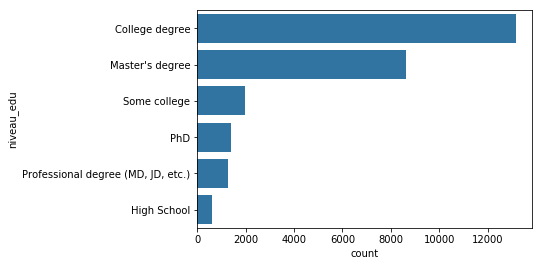

In [15]:
# Plotting the education levels
base_color = sb.color_palette()[0]
educ_index = df_salary.niveau_edu.value_counts().index
sb.countplot(data = df_salary, y = 'niveau_edu', color = base_color, order = educ_index);

### Observation

More than 21000 persons have either a college degree or a master's degree. _College degree_ is the highest education level for 13176 persons. 8614 have a _master's degree_, 1992 persons have followed _some college_ education. Only 2600 persons or so have either PhD or a Professional degree. And 607 persons have got High School degree.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the visual we notice the salary has almost a normal distribution the peak of which is between 50000 and 100000. 
> In fact, that is reinforced by statistics proof showing that more than 50% of persons actually in our dataset are paid 
> between 50000 and 100000 USD, which expalins why the peak is between those values. 
> Looking at the plot basis, just 28 persons have less than 10000 USD and 57 persons more than 500000 USD.
> We have considered salary values lesser than 2000 as outliers and got rid of them. Because of high values found, 
> we have used log 10 transformation to adapt the plot and make it easily readable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Form the above-mentioned important features, we have taken the top 10 industries and occupations with high number of persons.
> _Computing or Tech_ industry and related positions stood out to have more persons. We have noticed that the two experience
> columns were prone to be ordinal categorical variables as the ranges of values therein are ordered in ascending order. 
> So we converted them that way.

## Bivariate Exploration

> In this section, we'll investigate relationships between pairs of variables in our
data using the variables that we introduced in some the previous section (univariate exploration).

### Question 1 : How are salaries distributed through the top 10 industries ?

Here we will plot relationship between industry and salary.

In [28]:
# Data for top 10 industies
industries = df_salary.industrie.value_counts()[:10].index
df_top10_ind = df_salary[df_salary.industrie.isin(industries)]

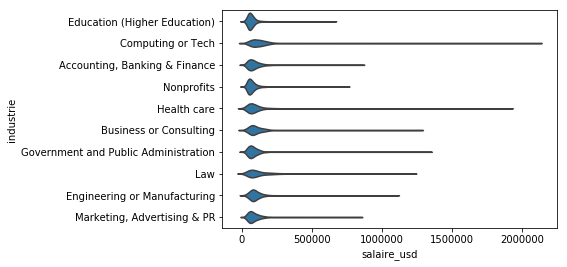

In [96]:
# Let's plot for all salaries first
base_color = sb.color_palette()[0]
sb.violinplot(data = df_top10_ind, y = 'industrie', x = 'salaire_usd', color = base_color, inner = None);

### Observation

We observe that for all top 10 industries high density is shown before 500000 USD. So we have decided to split the data and get jut salaries from the minimum up to 500000 USD ensuring the plotting order does not change for the top 10 industries.

In [123]:
# splitting to get salaries from minimum up to 500000 USD
# this helped get rid of more outliers
df_top10_ind = df_top10_ind[(df_top10_ind.salaire_usd <= 500000)]

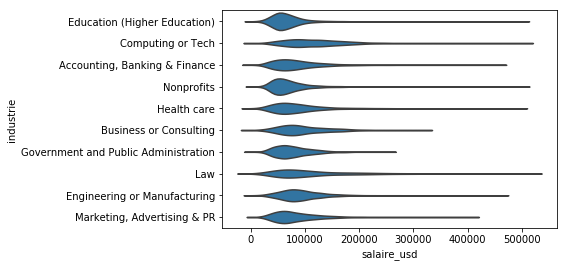

In [124]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df_top10_ind, y = 'industrie', x = 'salaire_usd', color = base_color, inner = None);

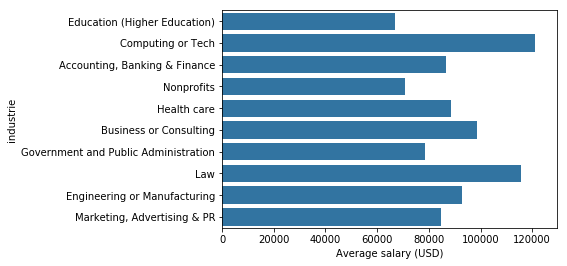

In [14]:
# To make things clearer let's these top 10 industries against salary average
base_color = sb.color_palette()[0]
sb.barplot(data= df_top10_ind, x= 'salaire_usd', y= 'industrie', color = base_color, errwidth = 0)
plt.xlabel('Average salary (USD)');

### Observation

Now we clearly see that _Computing or Tech_ industry has the best distribution of salaries with an average greater than 120000 USD. The next is _Law_ with about 110000 USD average followed by _Business or Consulting_. The rest of industies have less than 100000 USD average, among them _Higher Education_ is the last with generally low salaries.

### Question 2 : How are salaries distributed through the top 10 occupations ?

Here we will plot relationship between occupation and salary.

In [15]:
# Data for top 10 occupations
occupations = df_salary.occupation.value_counts()[:10].index
df_top10_occ = df_salary[df_salary.occupation.isin(occupations)]

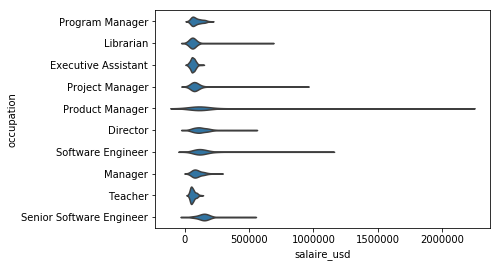

In [114]:
# Let's plot for all occupations first
base_color = sb.color_palette()[0]
sb.violinplot(data = df_top10_occ, y = 'occupation', x = 'salaire_usd', color = base_color, inner = None);

In [127]:
# splitting to get salaries from minimum up to 500000 USD
# this helped get rid of more outliers
df_top10_occ = df_top10_occ[(df_top10_occ.salaire_usd <= 500000)]

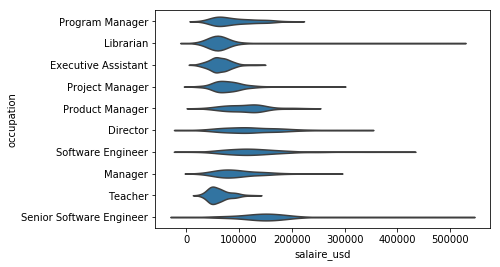

In [128]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df_top10_occ, y = 'occupation', x = 'salaire_usd', color = base_color, inner = None);

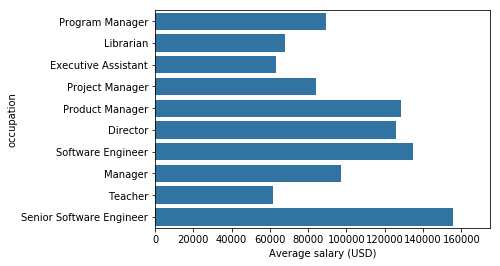

In [16]:
# To make things clearer let's these top 10 occupations against salary average
base_color = sb.color_palette()[0]
sb.barplot(data= df_top10_occ, x= 'salaire_usd', y= 'occupation', color = base_color, errwidth = 0)
plt.xlabel('Average salary (USD)');

### Observation

The position of _Senior Software Engineer_ has generally the highest average salary, more than 150000 USD, followed by _Software engineer_ with about an average of 140000 USD, _Product Manager_ and _Director_ with an average between 120000 and 140000 USD. The rest of occupations have an average of less than 100000 USD, among them _Teacher_ is the last with generally low salaries.

### Question 3 : How are salaries distributed through the experience ranges ?

Here we will plot relationship between annee_exp_totale and salary.

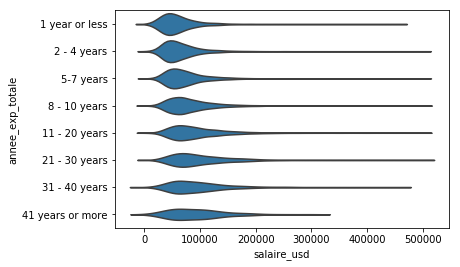

In [17]:
# Get salaries <= 500000 and plot
df_salary_500 = df_salary[df_salary.salaire_usd <= 500000]
base_color = sb.color_palette()[0]
sb.violinplot(data = df_salary_500, y = 'annee_exp_totale', x = 'salaire_usd', color = base_color, inner = None);

Here we will plot relationship between annee_exp_present and salary.

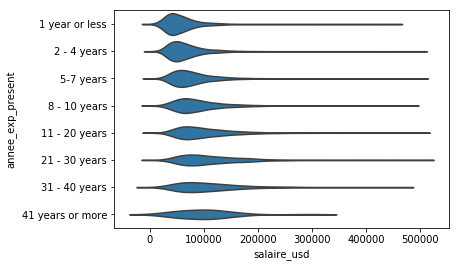

In [18]:
# Get salaries <= 500000 and plot
base_color = sb.color_palette()[0]
sb.violinplot(data = df_salary_500, y = 'annee_exp_present', x = 'salaire_usd', color = base_color, inner = None);

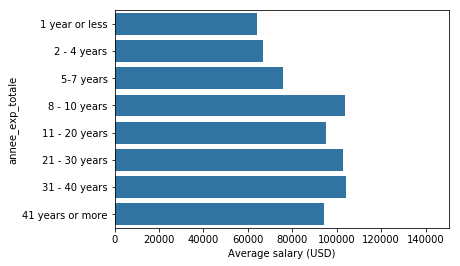

In [19]:
# Let's plot these against average salary

# For annee_exp_totale
base_color = sb.color_palette()[0]
sb.barplot(data= df_salary, x= 'salaire_usd', y= 'annee_exp_totale', color = base_color, errwidth = 0)
plt.xlabel('Average salary (USD)');

In [22]:
df_salary_500.shape

(26997, 17)

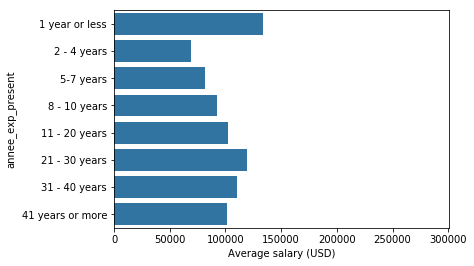

In [23]:
# annee_exp_present
base_color = sb.color_palette()[0]
sb.barplot(data= df_salary, x= 'salaire_usd', y= 'annee_exp_present', color = base_color, errwidth = 0)
plt.xlabel('Average salary (USD)');

### Observation

The Best distribution belongs to _11-20 years_, _21-30 years_ and _31-40 years_ ranges. _41 years or more_ and _8-10 years_ ranges have the next best distribution. The rest of ranges have low density.

Considering average salary, persons with total years between 31 and 40 have the highest average salary followed by those having from 8 to 10 years and those having from 21 to 30 years. On the other side, the average salary of persons starting their job or with 1 year of present experience is the highest.   

### Question 4 : How are salaries distributed through study levels ?

Here we will plot relationship between niveau_edu and salary.

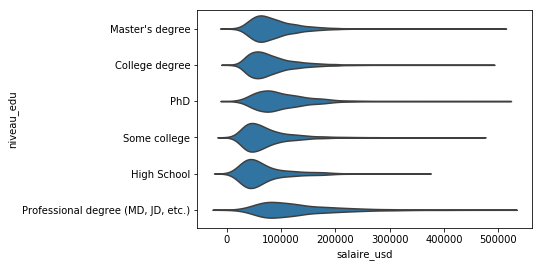

In [24]:
# Get salaries <= 500000 and plot
base_color = sb.color_palette()[0]
sb.violinplot(data = df_salary_500, y = 'niveau_edu', x = 'salaire_usd', color = base_color, inner = None);

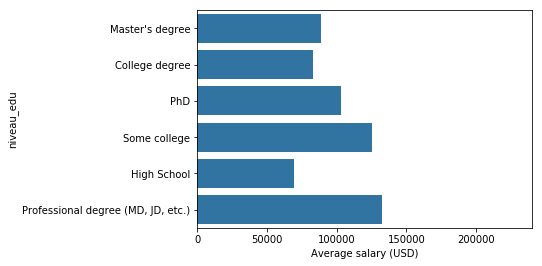

In [25]:
# niveau_edu
base_color = sb.color_palette()[0]
sb.barplot(data= df_salary, x= 'salaire_usd', y= 'niveau_edu', color = base_color, errwidth = 0)
plt.xlabel('Average salary (USD)');

### Observation

The _Professional degree_ has the best distribution, followed by PhD. The rest of levels seem to have the lowest salaries, with _Some college_ and _High School_ levels having peaker distributions. _High school_ is level has generally the lowest salaries.

### Ralationship between industry and study level features

In [55]:
df_top10_ind.industrie.value_counts()

Computing or Tech                       4510
Education (Higher Education)            2375
Nonprofits                              2362
Government and Public Administration    1846
Health care                             1835
Accounting, Banking & Finance           1742
Engineering or Manufacturing            1640
Marketing, Advertising & PR             1090
Law                                     1063
Business or Consulting                   820
Name: industrie, dtype: int64

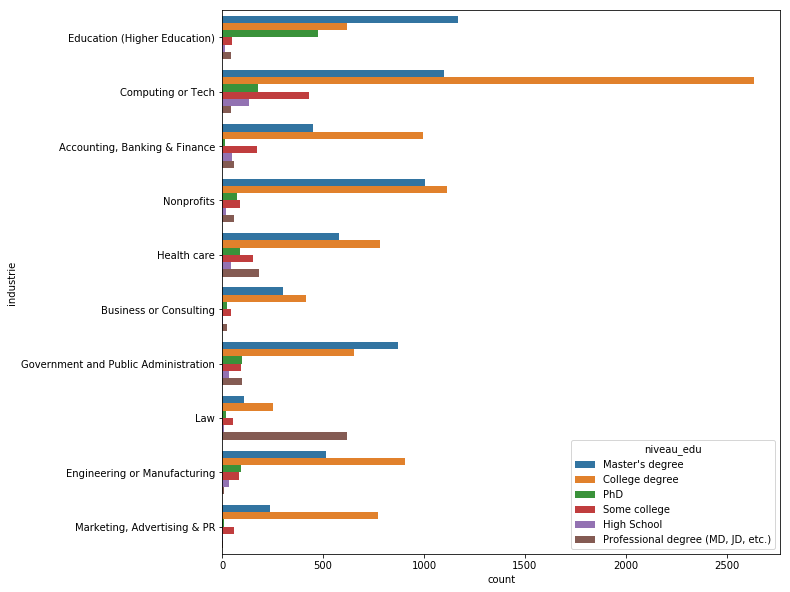

In [54]:
plt.figure(figsize= (10, 10))
sb.countplot(data = df_top10_ind, y = 'industrie', hue = 'niveau_edu');

### Relationship between occupation and study level

In [57]:
df_top10_occ.occupation.value_counts()

Software Engineer           278
Project Manager             223
Senior Software Engineer    193
Director                    190
Program Manager             148
Librarian                   146
Teacher                     145
Manager                     134
Executive Assistant         132
Product Manager             121
Name: occupation, dtype: int64

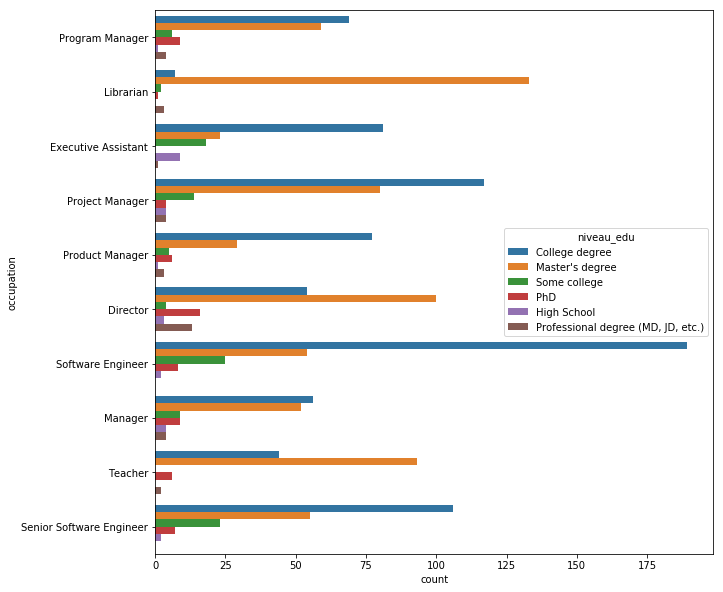

In [56]:
plt.figure(figsize= (10, 10))
sb.countplot(data = df_top10_occ, y = 'occupation', hue = 'niveau_edu');

### Observation

Under univariate exploration section, we stated that _Computing or Tech_ industry count is the highest among top 10 industries picked in the dataset, also _master_ and _College_ degrees were the most found among persons. From this plot we understand that those industries with higher counts generally have higher numbers of _master_ and _College_ degrees, which explain a relationship between industry and study level. The same observation is valid for the top 10 occupations picked too.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Now we clearly see that _Computing or Tech_ industry has the best distribution of salaries with an average greater 
> than 120000 USD. The next is _Law_ with about 110000 USD average followed by _Business or Consulting_. 
> The rest of industies have less than 100000 USD average, among them _Higher Education_ is the last with generally 
> low salaries.
> 
> The position of _Director_ has the best density followed by _Software engineer_, _Program Manager_, _Manager_, _Product
> Manager_ and _Senior Software Engineer_ have the next best density. _Teacher_, _Librarian_, _Executive Assistant_ have 
> low density. The position of _Senior Software Engineer_ has generally the highest average salary, more than 150000 USD, 
> followed by _Software engineer_ with about an average of 140000 USD, _Product Manager_ and _Director_ with an average 
> between 120000 and 140000 USD. The rest of occupations have an average of less than 100000 USD, among them _Teacher_ is 
> the last with generally low salaries.
> 
> For experience ranges of years, the Best distribution belongs to _11-20 years_, _21-30 years_ and _31-40 years_ ranges. 
> _41 years or more_ and _8-10 years_ ranges have the next best distribution. The rest of ranges have low density. Considering
> average salary, persons with total years between 31 and 40 have the highest average salary followed by those having from 8 to
> 10 years and those having from 21 to 30 years. On the other side, the average salary of persons starting their job or with 1
> year of present experience is the highest.
> 
> The _Professional degree_ has the best distribution, followed by PhD. The rest of levels seem to have the lowest salaries,
> with _Some college_ and _High School_ levels having peaker distributions. _High school_ is level has generally the lowest 
> salaries.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Under univariate exploration section, we stated that _Computing or Tech_ industry count is the highest among top 10 industries
> picked in the dataset, also _master_ and _College_ degrees were the most found among persons. From these plots we understand 
> that those industries with higher counts generally have higher numbers of _master_ and _College_ degrees, which explain a 
> relationship between industry and study level. The same observation is valid for the top 10 occupations picked too.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

For bivariate exploration we plotted industry against average salary. Here, we'll add study level feature to turn that plot into multivariate plot.

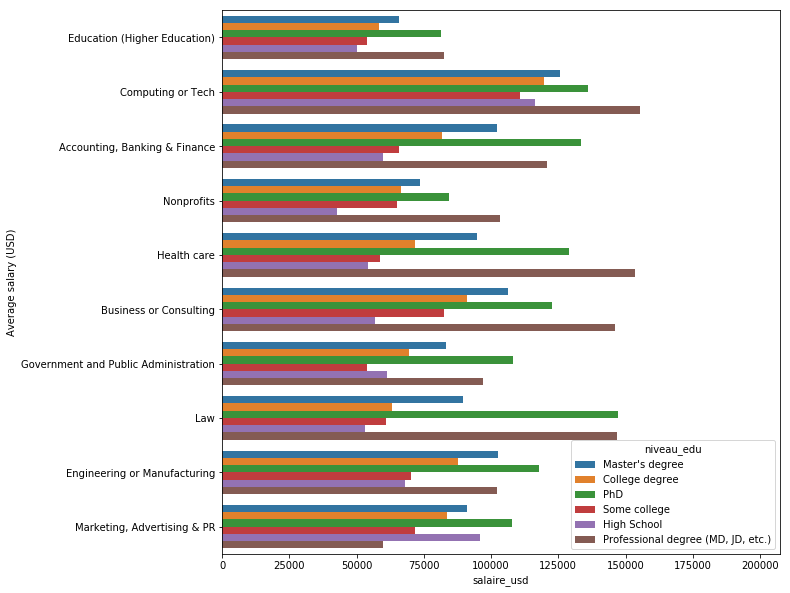

In [58]:
plt.figure(figsize= (10, 10))
sb.barplot(data= df_top10_ind, x = 'salaire_usd', y= 'industrie', hue= 'niveau_edu', errwidth = 0);
plt.ylabel('Average salary (USD)');

### Observation

Previously we noticed that _Computing or Tech_ industry has the highest count among the top 10 industries. We also remarked that _Professional degree_ has the highest average salary under bivariate exploration. Here we can see that for the first industry _Computing or Tech_ the average salary for Professional degree is the highest too, but that relationship is not the same for the rest of industries. For instance, the second industry is _Higher education_ but the average salary of _Professional degree_ in that industry is not the second highest average for this study level. This means that the relationship between industry and study level in view of average salary is not monotonic.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During univariate exploration we noticed that _Computing or Tech_ industry has the highest count among the top 10 industries. 
> We also remarked that _Professional degree_ has the highest average salary under bivariate exploration. We also showed a 
> relationship between industry and study level previously. Combining industry, study level and average salary we can see that
> for the first industry _Computing or Tech_ the average salary for Professional degree is the highest.


### Were there any interesting or surprising interactions between features?

> By examining the relationship between industry, study level and average salary we notice that relationship is not the same
> for the rest of industries. 
> For instance, the second industry is _Higher education_ but the average salary of _Professional degree_ in that industry is 
> not the second highest average for this study level through all 10 industries. In fact, the second highest average salary for
> Professional degree belong to Health care industry which is neither the second industry with the highest count nor the 
> industry with the second highest average salary. This means that the relationship between industry and study level in view of
> average salary is not monotonic.

## Conclusions

During the data exploration process, we covered univariate, bivariate and multivariatte explorations respectively to understand our dataset through one, two and three variables.

Under univariate exploration, we visualized our feature of interest using a histogram to see salary distribution. Looking at it we understood salary is almost normally distributed. Consequently we visualized other retained features : industry, job position and experience features using barplots since they are all categorical variables (two nominal and two ordinal). 
From plots under univariate exploration we noticed that: 

1. _Computer or Tech_ industry is the first of top 10 industries picked and _Business or Consulting_ is the last one.
2. _Software Engineer_ is the first of top 10 occupations picked and _Porduct Manager_ the last one
3. The group of persons with total years of experience _between 11 and 20_ has the highest count and that of persons having 41 years or more has the lowest count. This is the same observation even for years of experience in current jobs.
4. _College degree_ has the highest count and _High school_ has the lowest one.

From plots under bivariate exploration we noticed that:

1. _Computer or Tech_ has the best distribution of salary with the highest average salary and _Higher education_ the lowest salaries.
2. _Senior Software Engineer_ has the highest average salary among the top 10 occupations and _Teacher_ occupation has the lowest one.
3. Persons with total years of experience between 31 and 40 have the highest average salary. On the other side, the average salary of persons starting their job or with 1 year of present experience is the highest.
4. Average salary for _Professional degree_ is the highest while that of _High school_ is the lowest.
5. There seems to be a relationship between industry and study level according to which as the industry count grows greater generally the number of persons for each study levels grows almost accordingly. This observation is the same even for occupations

From plots under multivariate exploration, we understand that even though there is a relationship between industry and study level as stated before, that relationship changes its behaviour when plotted against average salary. This led to conclude that it not a monotonic relationship.